Ángela María Arias Cód. 201728551

Raúl Andrés Pardo Moreno Cód. 201727367

# Excercise 05 - Neural Networks

# 4.2 Boston House Price Prediction

In [19]:
import pandas as pd
import numpy as np
import pybrain
from matplotlib import pyplot as plt


1. Realizamos la carga de los datos 'Boston'


In [20]:
from sklearn.datasets import load_boston


2. Con los datos cargados creamos un DatraFrame usando el atributo .data

3. Assign the columns of the DataFrame so they match the .feature_names attribute from loading function of Scikit-learn.

In [21]:
data_boston=load_boston()

In [22]:
load_boston().feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [23]:
data_boston=pd.DataFrame(data_boston.data,columns=(load_boston().feature_names))

In [24]:
data_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


4. Assign a new column to the DataFrame which hold the value to predict, that means, the .target attribute of the loading function of Scikit-learn. The name of this column must be MEDV.

In [25]:
load_boston().target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [26]:
data_boston['MEDV']=load_boston().target

In [27]:
data_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


5. Use the function .describe() from Pandas for obtaining statistics about each column.

In [28]:
data_boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# 4.3 Feature Analysis:

Using de DataFrame generated in the previous section:
* Filter the dataset to just these features:
    * Explanatory: 'LSTAT', 'INDUS', 'NOX', 'RM', 'AGE'.
    * Dependent: 'MEDV'.

In [29]:
data_filter1=data_boston.loc[:,['LSTAT','INDUS','NOX','RM','AGE','MEDV']]
data_filter1.head()

,LSTAT,INDUS,NOX,RM,AGE,MEDV
0,4.98,2.31,0.538,6.575,65.2,24.0
1,9.14,7.07,0.469,6.421,78.9,21.6
2,4.03,7.07,0.469,7.185,61.1,34.7
3,2.94,2.18,0.458,6.998,45.8,33.4
4,5.33,2.18,0.458,7.147,54.2,36.2


* Generate a scatter matrix among the features mentioned above using Pandas (scatter_matrix) or Seaborn (pairplot)
    * Do you find any relationship between the features?

In [30]:
import seaborn as sns

C:\Users\andres\.anaconda\navigator\Anaconda_\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


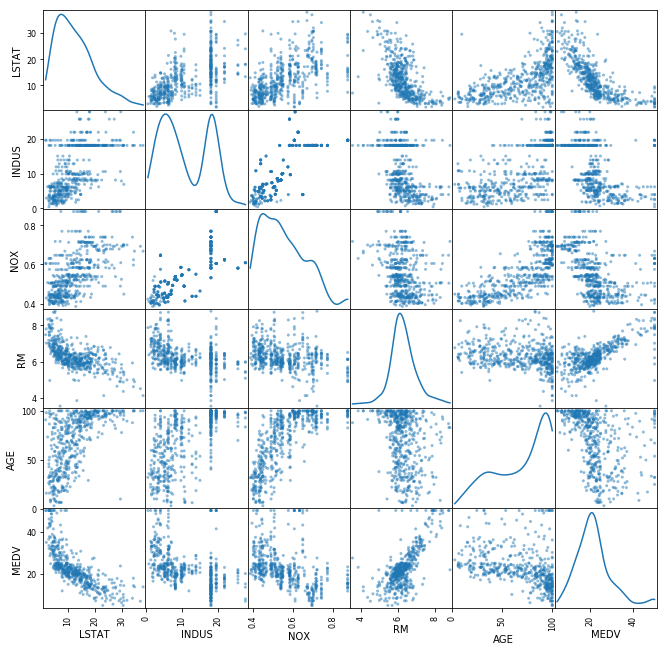

In [31]:
pd.scatter_matrix(data_filter1,figsize=(11,11),diagonal='kde')
plt.show()

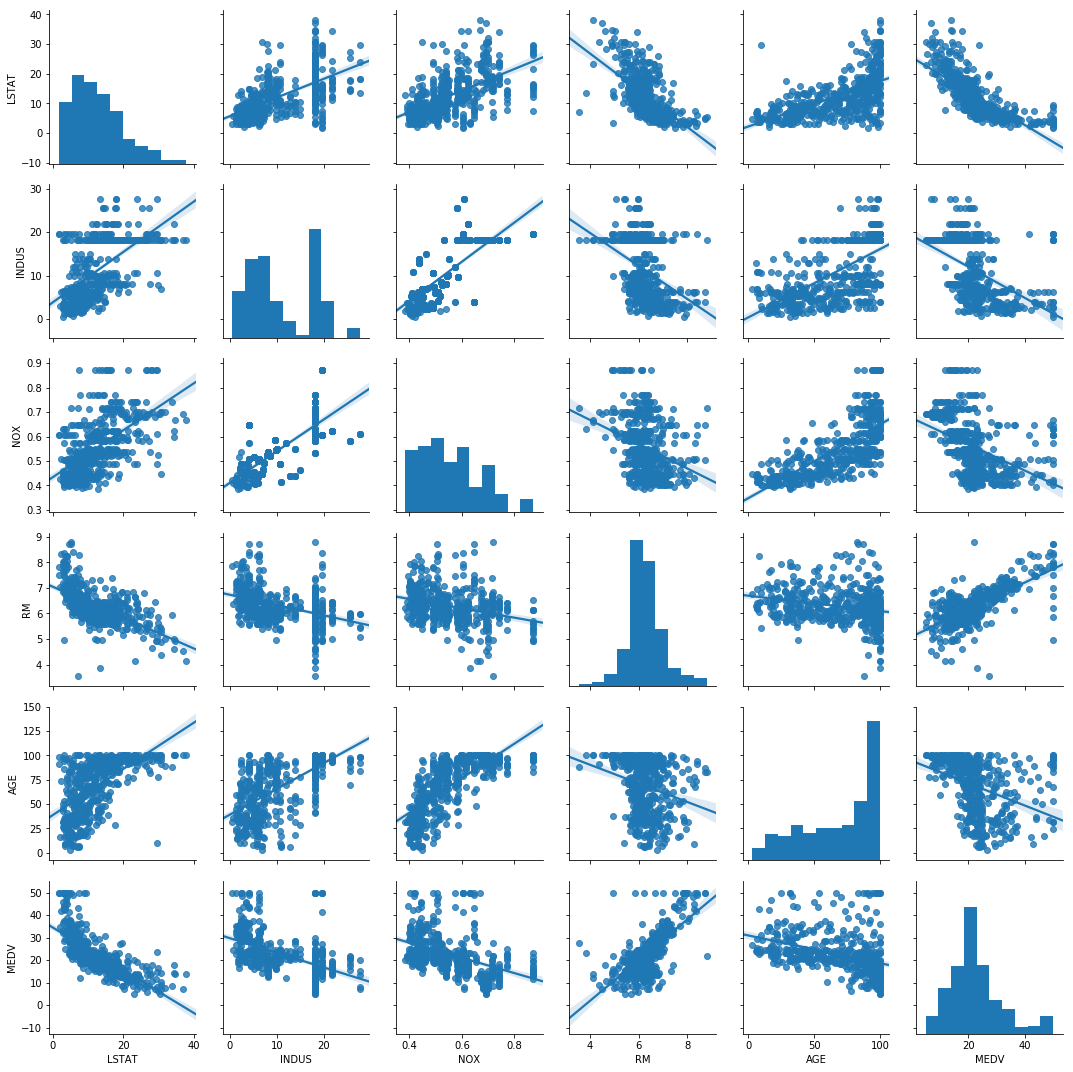

In [32]:
sns.pairplot(data_filter1,kind='reg')
plt.show()

Con respecto a las relaciones, se puede observar lo siguiente:
* LSTAT parece tener una relación exponencial con la variable respuesta MEDV.
* La variable RM tiene una relación lineal con la variable respuesta.
* En términos generales, se puede decir que todas las variables predictoras tienen algún tipp de relación con la variable respuesta.
* Entre las variables predictoras, las variables LSTAT y RM están muy relacionadas. Gráficamente, parece una relación tipo exponencial. Así mismo, la variable RM y NOX tienen algún tipo de relación lineal.

* Generate the correlation matrix between these variables using numpy.corrcoef. Also include MEDV.

In [33]:
matrix_corr=np.corrcoef(data_filter1,rowvar=False)
matrix_corr

array([[ 1.        ,  0.60379972,  0.59087892, -0.61380827,  0.60233853,
        -0.73766273],
       [ 0.60379972,  1.        ,  0.76365145, -0.39167585,  0.64477851,
        -0.48372516],
       [ 0.59087892,  0.76365145,  1.        , -0.30218819,  0.7314701 ,
        -0.42732077],
       [-0.61380827, -0.39167585, -0.30218819,  1.        , -0.24026493,
         0.69535995],
       [ 0.60233853,  0.64477851,  0.7314701 , -0.24026493,  1.        ,
        -0.37695457],
       [-0.73766273, -0.48372516, -0.42732077,  0.69535995, -0.37695457,
         1.        ]])

Las variables o características que estan más correlacionadas son: LSTAT-MEDV, INDUS-NOX, NOX-AGE, RM-MEDV

BONUS: Visualize this matrix as heat map using Pandas, Matplotlib or Seaborn.

El mapa de calor de la matríz de correlaciónes fue hecha con Seaborn


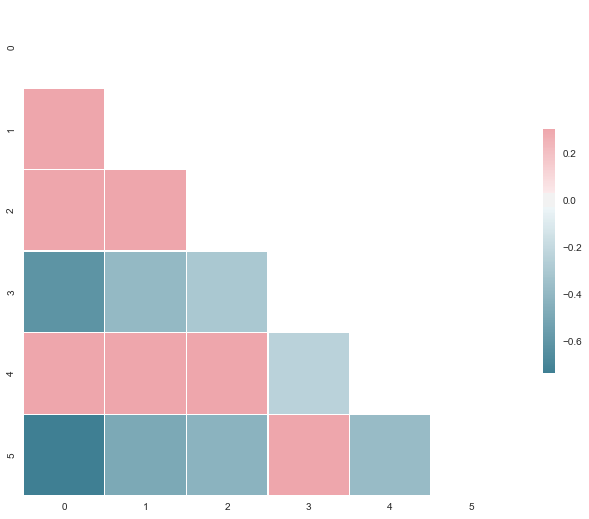

In [34]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")
corr = np.corrcoef(data_filter1, rowvar=False)

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

print('El mapa de calor de la matríz de correlaciónes fue hecha con Seaborn')

# 4.4 Modeling linear and non linear relationships

* Generate two new subsets filtering these characteristics:
    * D1: X='RM', y='MEDV'
    * D2: X='LSTAT', y='MEDV'

In [35]:
D1=data_filter1.loc[:,['RM','MEDV']]
D1.head()

,RM,MEDV
0,6.575,24.0
1,6.421,21.6
2,7.185,34.7
3,6.998,33.4
4,7.147,36.2


In [36]:
D2=data_filter1.loc[:,['LSTAT','MEDV']]
D2.head()

,LSTAT,MEDV
0,4.98,24.0
1,9.14,21.6
2,4.03,34.7
3,2.94,33.4
4,5.33,36.2


* Generate a training and test partition (70%-30%)

In [37]:
from sklearn.model_selection import train_test_split
seed=8
val_size=0.3
D1_train, D1_val,= train_test_split(D1, test_size=val_size, random_state=seed)
D2_train, D2_val,= train_test_split(D2, test_size=val_size, random_state=seed)

In [38]:
D1_train.shape, D1_val.shape, D2_train.shape, D2_val.shape

((354, 2), (152, 2), (354, 2), (152, 2))

* Train a linear regression model on both subsets of data:

Primero, vamos a separar la variable independiente de la dependiente, tanto para los datos training como para los datos test.

In [39]:
X_D1_train=D1_train['RM']
Y_D1_train=D1_train['MEDV']
X_D1_val=D1_val['RM']
Y_D1_val=D1_val['MEDV']


In [46]:
X_D1_train.shape, Y_D1_train.shape, X_D1_val.shape, Y_D1_val.shape, 

((354,), (354,), (152,), (152,))

In [40]:
X_D2_train=D2_train['LSTAT']
Y_D2_train=D2_train['MEDV']
X_D2_val=D2_val['LSTAT']
Y_D2_val=D2_val['MEDV']


In [41]:
X_D2_train.shape, Y_D2_train.shape, X_D2_val.shape, Y_D2_val.shape, 

((354,), (354,), (152,), (152,))

Corremos el modelo de Regresión Lineal

In [42]:
from sklearn.linear_model import LinearRegression

In [43]:
modelD1 = LinearRegression()
modelD1.fit(X_D1_train[:,None],Y_D1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Generamos las predicciones:

In [44]:
predict_D1=modelD1.predict(X_D1_val[:,None])

Calculamos la Media del Error Cuadrado para el modelo 1 (variable predictora 'RM')

In [45]:
from sklearn import metrics
print('MSE1:', metrics.mean_squared_error(Y_D1_val, predict_D1))

MSE1: 38.79584725304807


Ahora ajustamos el modelo de regresión lineal para el segundo conjunto de datos (variable predictora 'LSTAT')

In [46]:
modelD2 = LinearRegression()
modelD2.fit(X_D2_train[:,None],Y_D2_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [47]:
predict_D2=modelD2.predict(X_D2_val[:,None])

In [48]:
print('MSE2:', metrics.mean_squared_error(Y_D2_val, predict_D2))

MSE2: 41.047105298872026


El modelo con el menor Error es es modelo 1 (variable predictora RM)

* Print the values of w and w0 of the regression equation.

Subconjunto 1

In [49]:
print(modelD1.coef_)
print(modelD1.intercept_)

[9.41736971]
-36.75988015643732


Subconjunto 2

In [50]:
print(modelD2.coef_)
print(modelD2.intercept_)

[-0.98252724]
34.976301202442265


* Generate a graph where you visualize the line obtained by the regression model in conjunction with the training data and the test data.

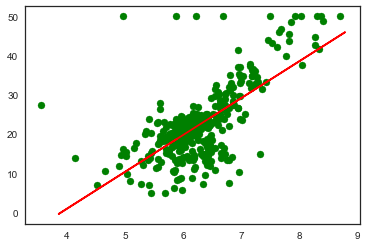

In [51]:
plt.scatter(X_D1_train,Y_D1_train,c='green')
plt.plot(X_D1_val,predict_D1,'-r')

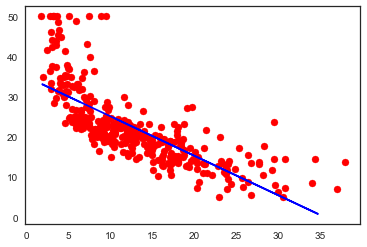

In [52]:
plt.scatter(X_D2_train,Y_D2_train,c='red')
plt.plot(X_D2_val,predict_D2,'-b')

Tomando en cuenta la Media de los Errores Cuadrados, el modelo D1 se ajusta mejor. Gráficamente, los dos modelos se ajustan bien, sin embargo, el segundo modelo presenta cierta curvatura en los extremos, dando a entender que algún modelo cuadrático o similar podría hacer un mejor ajuste.

# 4.5 Training a regression model

* Generate a 70-30 partioning of the data using all the features. (Do not include the dependent variable MEDV)

In [53]:
newdata=data_boston
newdata.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Separamos la data en training (70%) y test (30%)

In [54]:
seed=8
val_size=0.3
newdata_train, newdata_val,= train_test_split(newdata, test_size=val_size, random_state=seed)

In [56]:
print(newdata_train.shape)
print(newdata_val.shape)

(354, 14)
(152, 14)


* Train a linear regression model with the objective of predicting the output variable MEDV.

In [57]:
X_train=newdata_train.iloc[:,0:13]
Y_train=newdata_train['MEDV']

In [58]:
X_val=newdata_val.iloc[:,0:13]
Y_val=newdata_val['MEDV']


Ajuste del modelo de regresión lineal:

In [59]:
full_model = LinearRegression()
full_model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [60]:
print(full_model.coef_)

[-1.08147197e-01  5.31051483e-02  2.38994326e-02  2.49090330e+00
 -1.22765119e+01  3.87343558e+00 -8.57888672e-03 -1.39335930e+00
  2.71743724e-01 -1.11596264e-02 -9.35393996e-01  1.06772969e-02
 -5.60774287e-01]


* Report the mean square error on the test set

In [61]:
predict_fullmodel=full_model.predict(X_val)

In [67]:
print('MSE_full:', metrics.mean_squared_error(Y_val, predict_fullmodel))

MSE_full: 23.7209154794952


* Train a regression model using MLPRegressor in order to predict the output variable MEDV.

In [94]:
from sklearn.neural_network import MLPRegressor
modelo_MLP=MLPRegressor(hidden_layer_sizes=(13),activation='relu',solver='adam',alpha=0.0001)
modelo_MLP.fit(X_train,Y_train)

C:\Users\andres\.anaconda\navigator\Anaconda_\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=13, learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [95]:
prediction_MLP=modelo_MLP.predict(X_val)

* Report the mean square error on the test set.

In [96]:
print('MSE_MLP:', metrics.mean_squared_error(Y_val, prediction_MLP))

MSE_MLP: 190.60544672089605


* Scale the data so they have zero mean variance one per feature (only X). You can use the following piece of code:

In [74]:
newdata.iloc[0:5,0:13]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [75]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_x.fit(newdata.iloc[:,0:13])


StandardScaler(copy=True, with_mean=True, with_std=True)

In [78]:
X_train_s = sc_x.transform(X_train)
X_test_s = sc_x.transform(X_val)

1. Train a linear regression model using the scaled data.

In [87]:
centr_model = LinearRegression()
centr_model.fit(X_train_s,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [88]:
predict_centr_model=centr_model.predict(X_test_s)

Report the mean square error on the test set.

In [89]:
print('MSE_centr_model:', metrics.mean_squared_error(Y_val, predict_centr_model))

MSE_centr_model: 23.720915479495368


2. Train a regression model using a 2-layer MultiLayer Perceptron (128 neurons in the first and 512 in the second) and with the scaled data.

In [97]:
from sklearn.neural_network import MLPRegressor
modelo_MLP_cent=MLPRegressor(hidden_layer_sizes=(128,512),activation='relu',solver='adam',alpha=0.0001)
modelo_MLP_cent.fit(X_train_s,Y_train)

C:\Users\andres\.anaconda\navigator\Anaconda_\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(128, 512), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [98]:
prediction_MLP_cent=modelo_MLP_cent.predict(X_test_s)

In [99]:
print('MSE_MLP_cent:', metrics.mean_squared_error(Y_val, prediction_MLP_cent))

MSE_MLP_cent: 12.66170798809783


4.5
 3.) Which model has better performance? Why?
print('El modelo que tiene mejor performance es el Regression Model MLP debido a que su MSE resulta ser el más pequeño:',metrics.mean_squared_error(Y_val, prediction_MLP_cent)).


Esto se debe a que se esta usando una rede neuronal con 2 capas que contienen una cantidad considerable de neuronas, las cuales mejoran la exactitud del modelo.

FIN